# 🌎 U.S. Workplace Injury Analysis 🌎

# -- (Part 2 of 2) --

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-required-libraries" data-toc-modified-id="Import-required-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import required libraries</a></span></li><li><span><a href="#Importing-Dataframe" data-toc-modified-id="Importing-Dataframe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Dataframe</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Import required libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np
import pickle

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataframe

In [2]:
# Unpickling "osha_df_clean" to import the dataframe 
filename = 'clean_data'
infile = open(filename,'rb')
df = pickle.load(infile)
infile.close()

In [3]:
# dataframe preview:
df.head()

,id,company_name,establishment_name,state,naics_code,total_hours_worked,injury_illness,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,size,year_filing_for,naics_industry_description,TCR,DART
3,7,The Talaria Company,"Morris Yachts, LLC",ME,336612,75794.0,yes,0,0,1,0,0,49,1,20-249,2016,Air boat building,2.638731,2.638731
4,8,The Talaria Company,"Hunt Yachts, LLC",RI,336612,114734.0,yes,0,3,0,3,92,0,6,20-249,2016,Air boat building,10.458975,5.229487
5,9,Mohawk Bridge Iron,"Mohawk Bridge & Iron, Inc.",MD,238120,135507.0,no,0,0,0,0,0,0,0,20-249,2016,"Balcony, precast concrete, installation",0.000000,0.000000
6,10,Huxford Pole Timber Company,"Huxford Pole & Timber Company, Inc.",AL,321114,65092.0,yes,0,1,0,0,2,0,1,20-249,2016,"Bridge and trestle parts, wood, treating",3.072574,3.072574
7,11,Sc Transport,Transportation,MI,484220,118149.0,yes,0,2,0,0,105,112,2,20-249,2016,"Agricultural products trucking, local",3.385556,3.385556


In [4]:
# making a copy of the dataframe with only numerical values:
df_numerical = df.select_dtypes(include="number")
df_numerical.head()

,id,naics_code,total_hours_worked,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_dafw_days,total_djtr_days,total_injuries,year_filing_for,TCR,DART
3,7,336612,75794.0,0,0,1,0,0,49,1,2016,2.638731,2.638731
4,8,336612,114734.0,0,3,0,3,92,0,6,2016,10.458975,5.229487
5,9,238120,135507.0,0,0,0,0,0,0,0,2016,0.000000,0.000000
6,10,321114,65092.0,0,1,0,0,2,0,1,2016,3.072574,3.072574
7,11,484220,118149.0,0,2,0,0,105,112,2,2016,3.385556,3.385556


## Exploratory Data Analysis (EDA)

In previous notebook "analysis_part1.ipynb", we have imported and processed all the raw data, getting a clean dataset as output. 

In this step, we will use this output to perform additional EDA (Exploratory Data Analysis), to plot our variables in order to extract meaningful insights and conclusions about our data, by means of visual explorations.

Exploratory data analysis is based on graphical and descriptive techniques whose objective is to gain intuition about the data, detect outliers, extract important variables and, in general, discover underlying structures in the data. It also allows organizing the data, detecting failures and evaluating the existence of missing data.

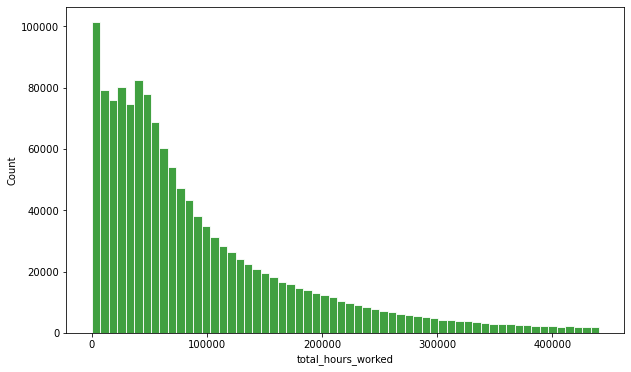

In [5]:
# total worked hours histogram plot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df['total_hours_worked'], bins=60, edgecolor='white', ax=ax, color='green');

Total injuries recorded: 2280073 


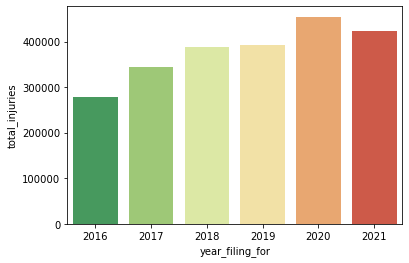

In [6]:
# Sum of injuries per year between 2016-2021
print('Total injuries recorded: {} '.format(df['total_injuries'].sum()))

sns.barplot(x = df.groupby('year_filing_for')['total_injuries'].sum().index, 
            y = df.groupby('year_filing_for')['total_injuries'].sum(),
           palette='RdYlGn_r');

Average TCR by year: year_filing_for
2016    3.963683
2017    4.300468
2018    4.222766
2019    4.180378
2020    4.311314
2021    4.189305
Name: TCR, dtype: float64 


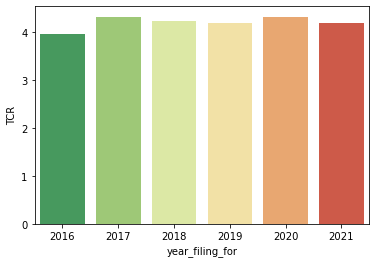

In [7]:
# TCR per year between 2016-2021
print('Average TCR by year: {} '.format(df.groupby('year_filing_for')['TCR'].mean()));

sns.barplot(x = df.groupby('year_filing_for')['TCR'].mean().index, 
            y = df.groupby('year_filing_for')['TCR'].mean(),
           palette='RdYlGn_r');

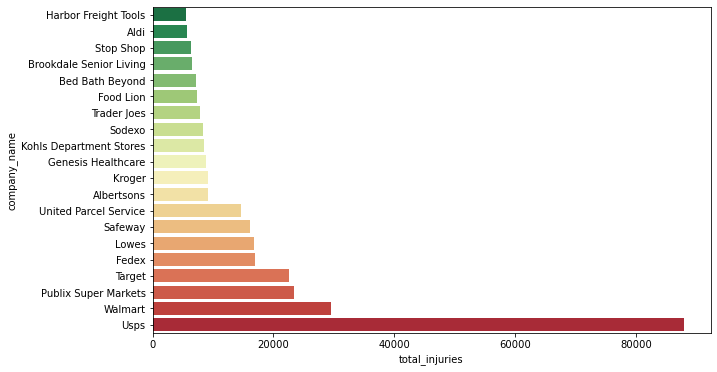

In [8]:
# Companies that registered highest number of total injuries between 2016-2021
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=df.groupby('company_name')['total_injuries'].sum().sort_values(ascending=False).head(20).sort_values(),
            y = df.groupby('company_name')['total_injuries'].sum().sort_values(ascending=False).head(20).sort_values().index,
            ax=ax,
            palette='RdYlGn_r');

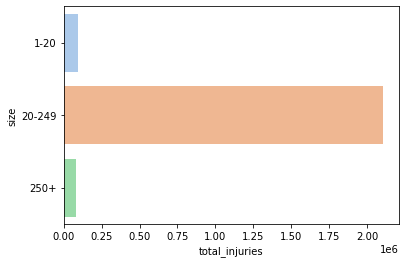

In [9]:
# Sum of injuries per Company Size
sns.barplot(x = df.groupby('size')['total_injuries'].sum(),
            y = df.groupby('size')['total_injuries'].sum().index,
           palette='pastel');

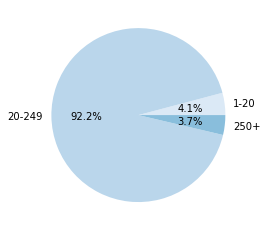

In [16]:
# Sum of injuries per Company Size
plt.pie(df.groupby('size')['total_injuries'].sum(), 
        labels = df.groupby('size')['total_injuries'].sum().index, 
        colors=sns.color_palette('Blues'), 
        autopct='%.1f%%');

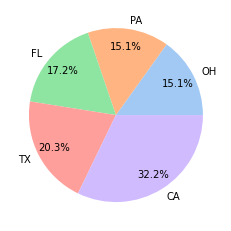

In [11]:
# States that registered highest number of total injuries between 2016-2021
plt.pie(df.groupby('state')['total_injuries'].sum().sort_values(ascending=False).head().sort_values(), 
        labels = df.groupby('state')['total_injuries'].sum().sort_values(ascending=False).head().sort_values().index, 
        colors=sns.color_palette('pastel'), 
        pctdistance=0.8,
        autopct='%.1f%%');

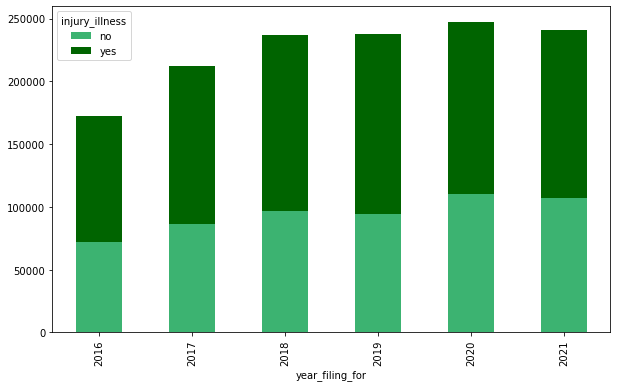

In [12]:
# number of recorded injuries per year per injury category
pd.crosstab(index=df['year_filing_for'], 
            columns=df['injury_illness']).plot.bar(stacked=True, color=["mediumseagreen", "darkgreen"], figsize=(10,6));

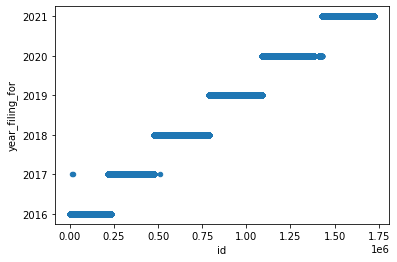

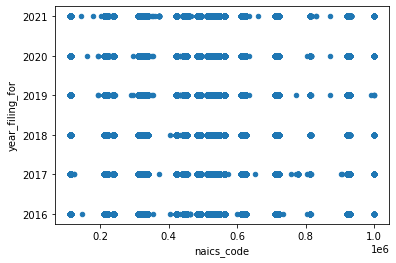

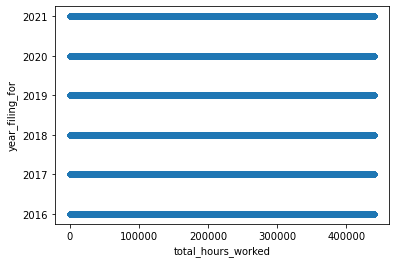

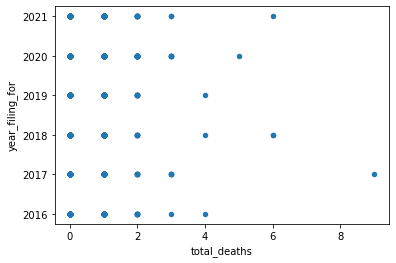

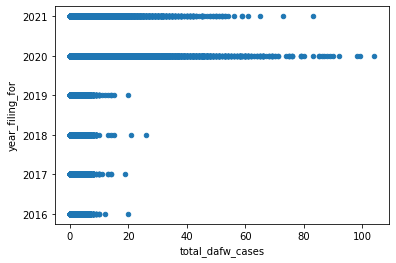

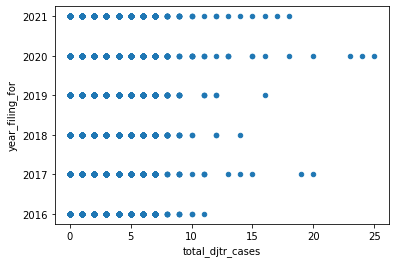

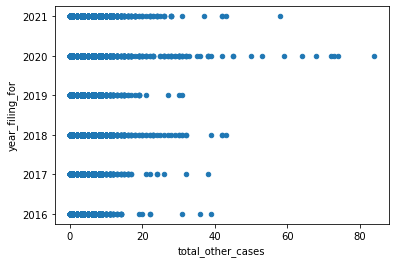

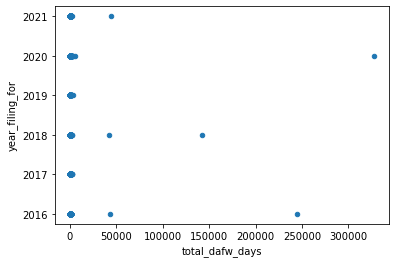

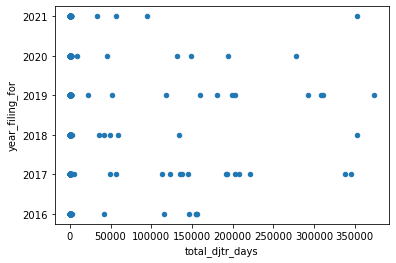

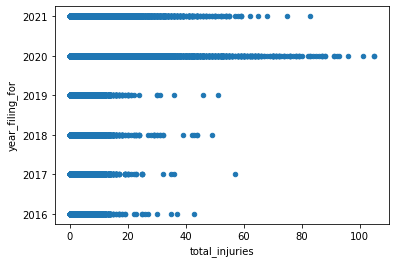

In [13]:
# Relation between numerical variables and year of incident
for idx in df_numerical.columns[:10]:
    df_numerical.plot(kind="scatter", x=idx, y="year_filing_for")

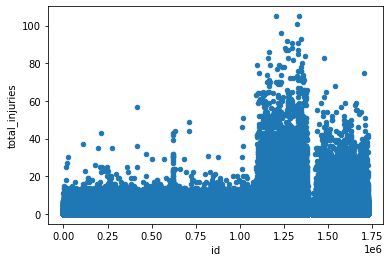

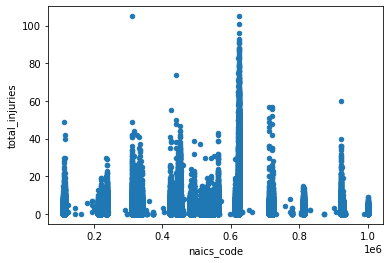

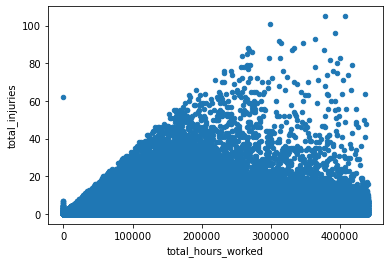

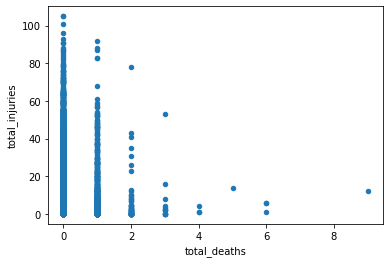

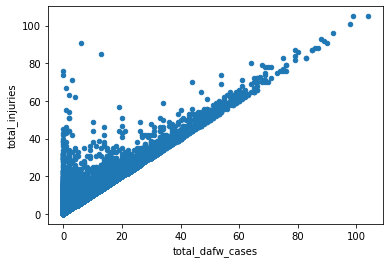

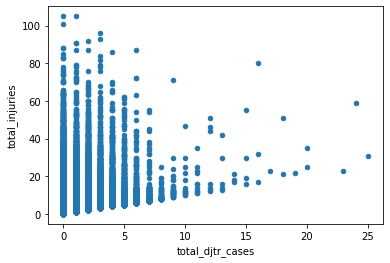

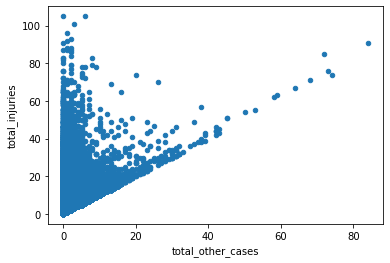

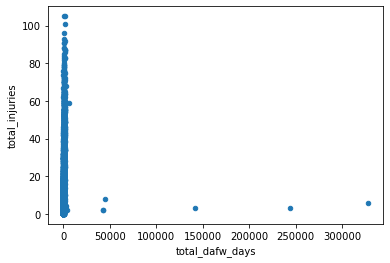

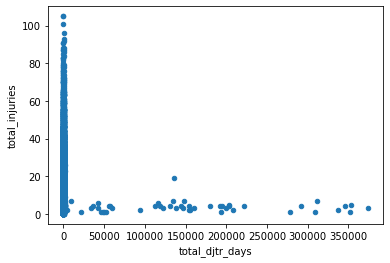

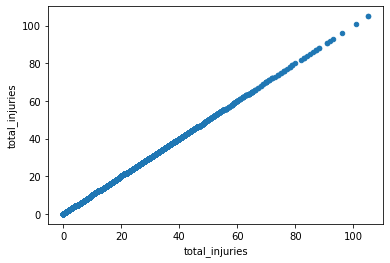

In [14]:
# Relation between numerical variables and total hours worked
for idx in df_numerical.columns[:10]:
    df_numerical.plot(kind="scatter", x=idx, y="total_injuries")

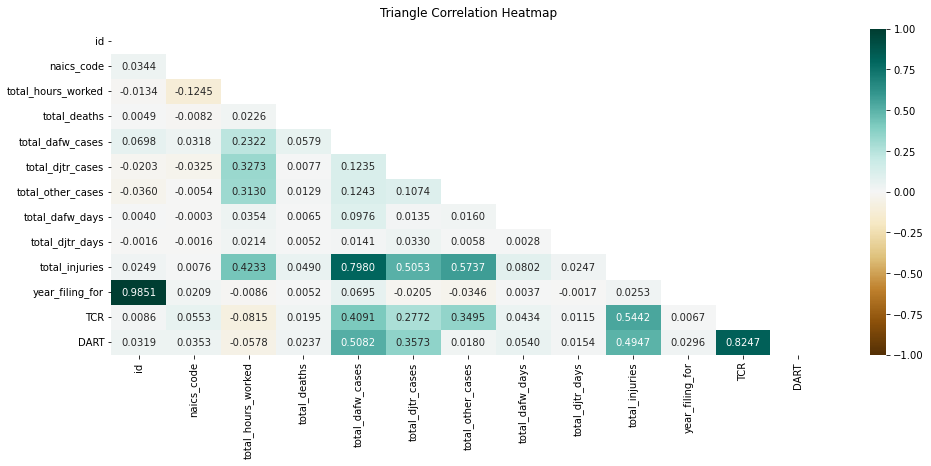

In [15]:
# Triangle Correlation heatmap 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_numerical.corr(), dtype='bool'))
heatmap = sns.heatmap(df_numerical.corr(), mask=mask, cmap='BrBG', vmin=-1, vmax=1, annot=True, fmt='.4f');
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Conclusions

* 2020 has the highest number of recorded injury/illness and TCR
* TCR is similar for all recorded years
* USPS is the company that registered highest number of total injuries, followed by Walmart.
* 92.2% of the companies are SME (Small Medium Enterprises) with 20-249 employees
* 53.5% of injuries/illnesses occur only in the states of California and Texas
* There is correlation between injury cases and hours worked, dafw cases (days away from work) and djtr cases (job transfers or restrictions)

**… but the most important one:**

Data Cleaning and Data Pre-processing part is essential.

Fighting with your data, will make it to confess their secrets. Correct insights can only be extracted if you have good data.